# Parkinsons Disease Prediction

Parkinson's disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves.

Objective: To detect Whether a person has parkinsons disease or not.

# Data Gathering and preparation

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# reading the dataset and putting it into a dataframe df
df = pd.read_csv('parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# displaying the number of rows and columns
df.shape

(195, 24)

In [4]:
# checking the feature columns
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
# checking the datatype of the feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# removing the unnecessary features
df = df.drop('name',axis=1)

In [7]:
# displaying the dataframe
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
# checking whether there are missing values or not
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
# statiscal measures of the dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
# distribution of target variable
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

# Data Quality Check

In [11]:
#check for accepted range or set of values and print the number of rows where value < 0 in each numerical column
for i in dict(df.dtypes):
  if(dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    print(i , " : ", df[df[i]<0].shape[0])

MDVP:Fo(Hz)  :  0
MDVP:Fhi(Hz)  :  0
MDVP:Flo(Hz)  :  0
MDVP:Jitter(%)  :  0
MDVP:Jitter(Abs)  :  0
MDVP:RAP  :  0
MDVP:PPQ  :  0
Jitter:DDP  :  0
MDVP:Shimmer  :  0
MDVP:Shimmer(dB)  :  0
Shimmer:APQ3  :  0
Shimmer:APQ5  :  0
MDVP:APQ  :  0
Shimmer:DDA  :  0
NHR  :  0
HNR  :  0
status  :  0
RPDE  :  0
DFA  :  0
spread1  :  195
spread2  :  0
D2  :  0
PPE  :  0


# Detecting outliers (extreme values) using BOX PLOT

From above we can see that in Spread1 feature the readings are negative.

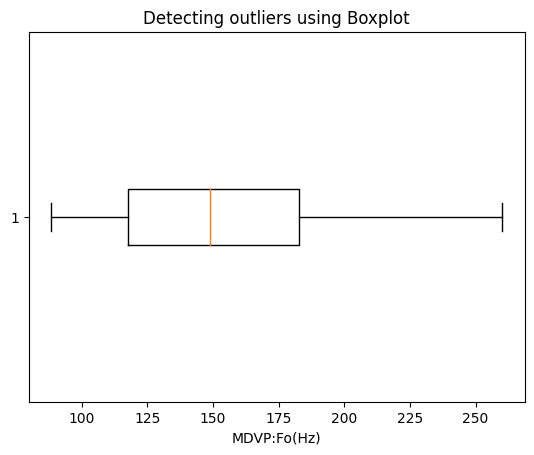

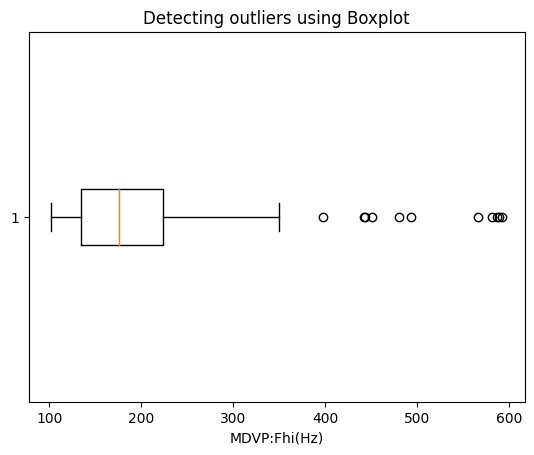

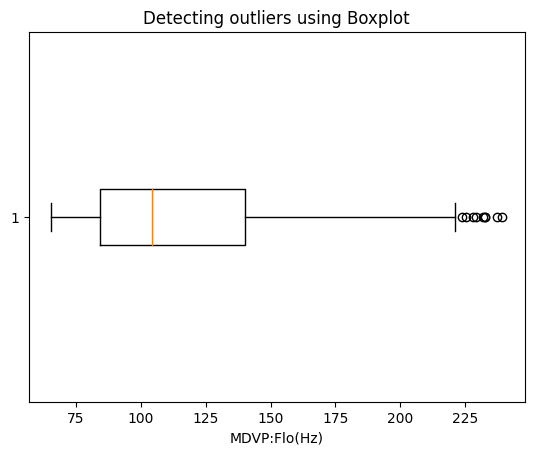

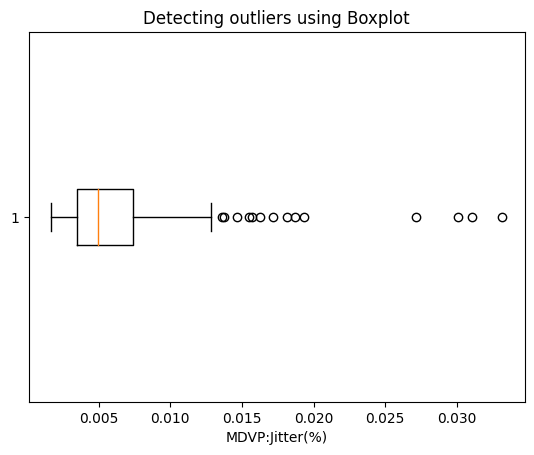

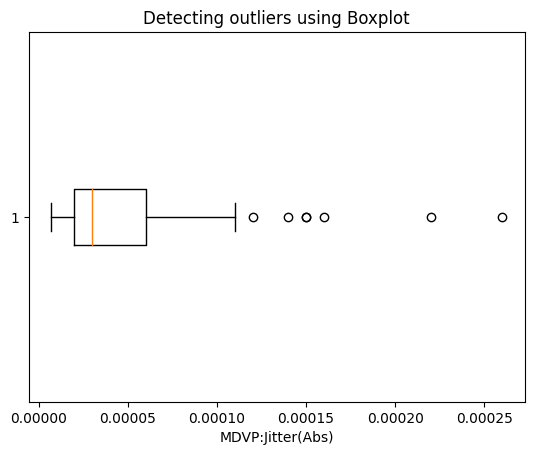

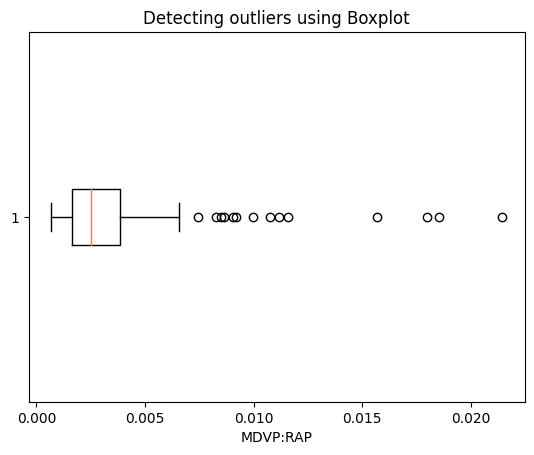

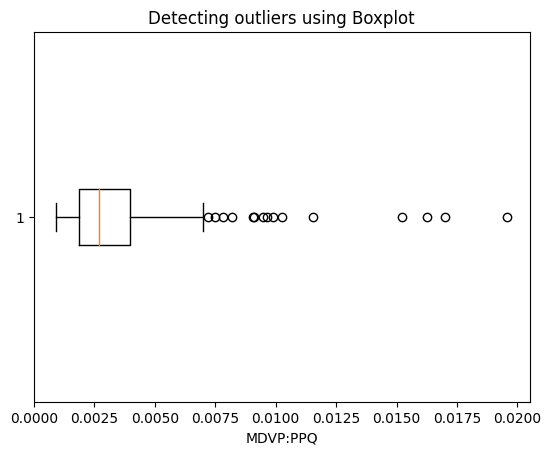

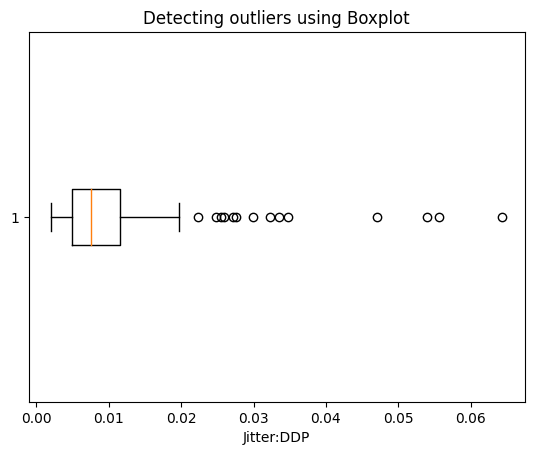

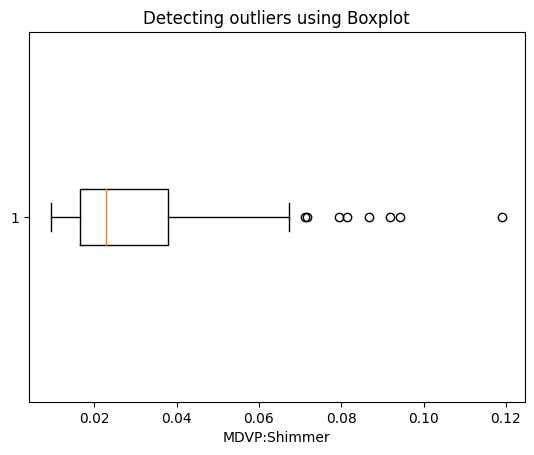

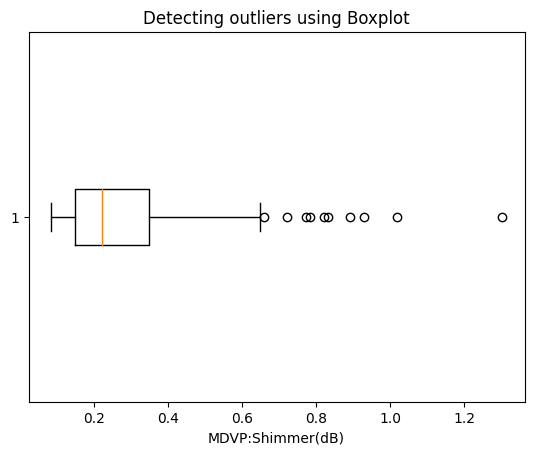

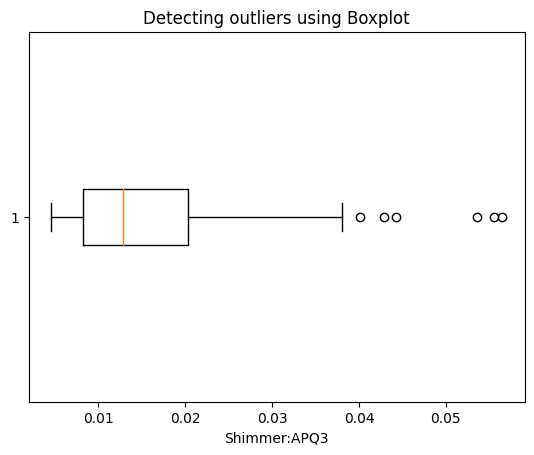

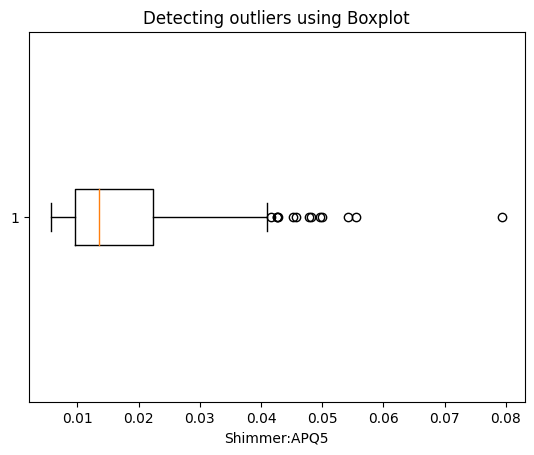

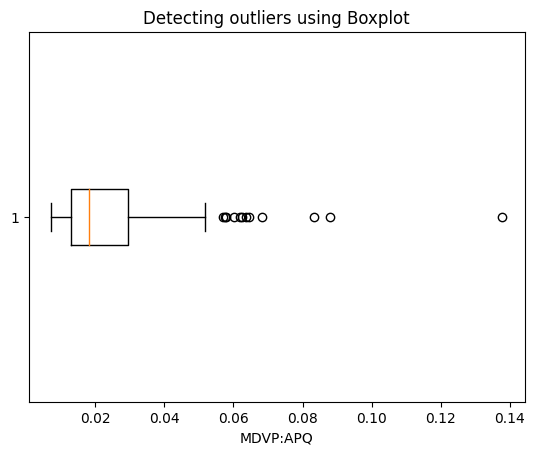

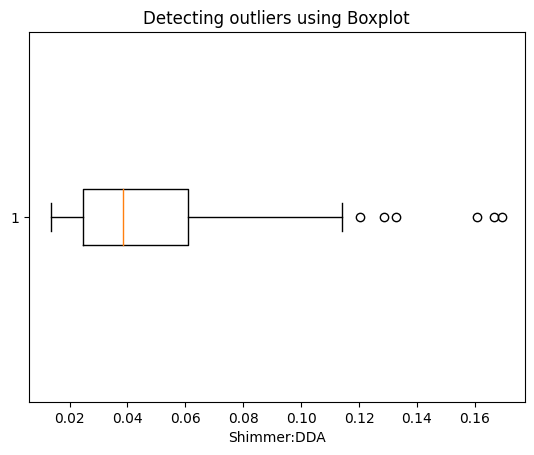

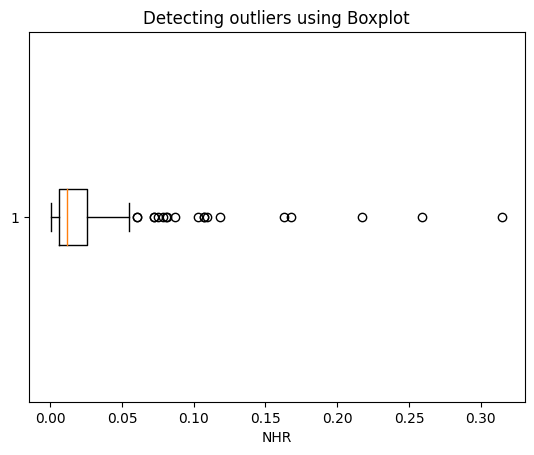

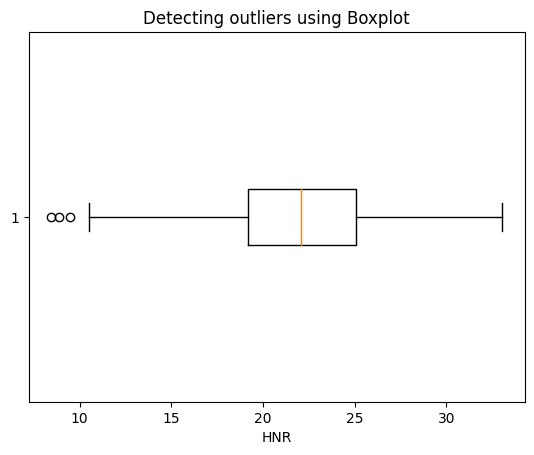

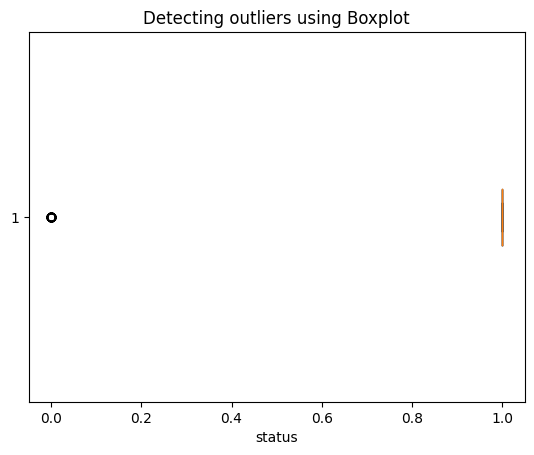

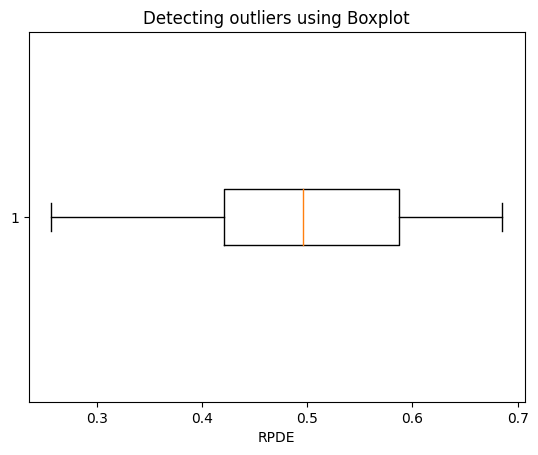

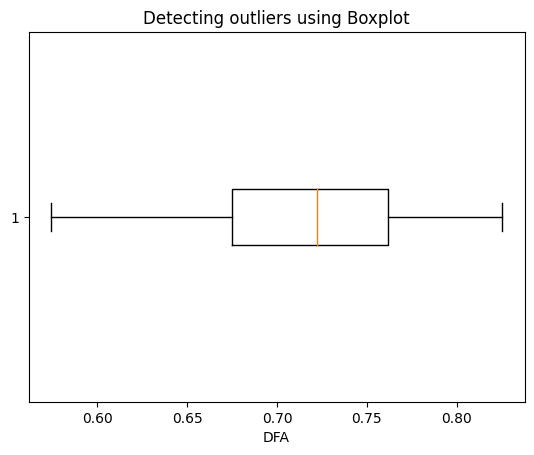

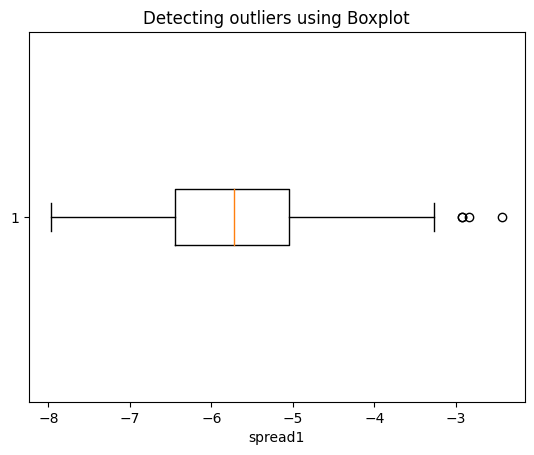

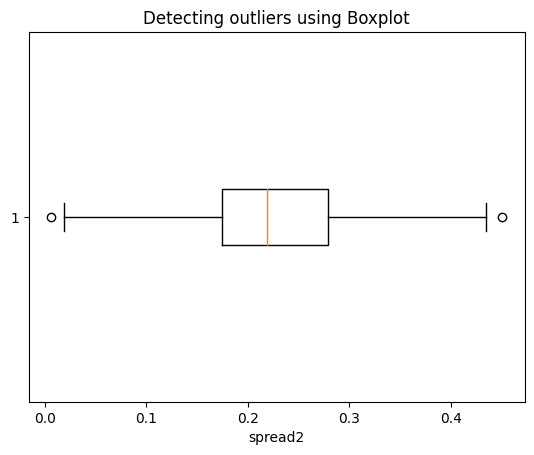

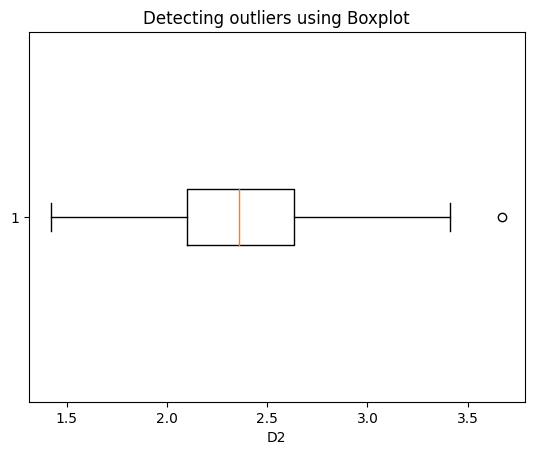

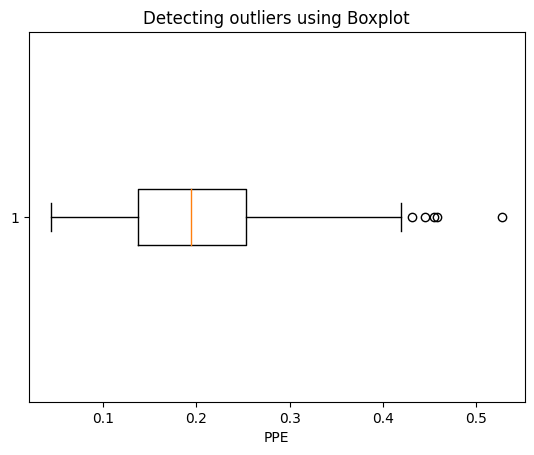

In [12]:
#importing the dependency
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

### From above we can see that there are many outliers, but we don't need to handle those outliers for this case because outliers are necessary informations which will help us classify and detect the parkinson's disease.

In [13]:
# checking how many unique values are present in each of the columns
df.nunique()

MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

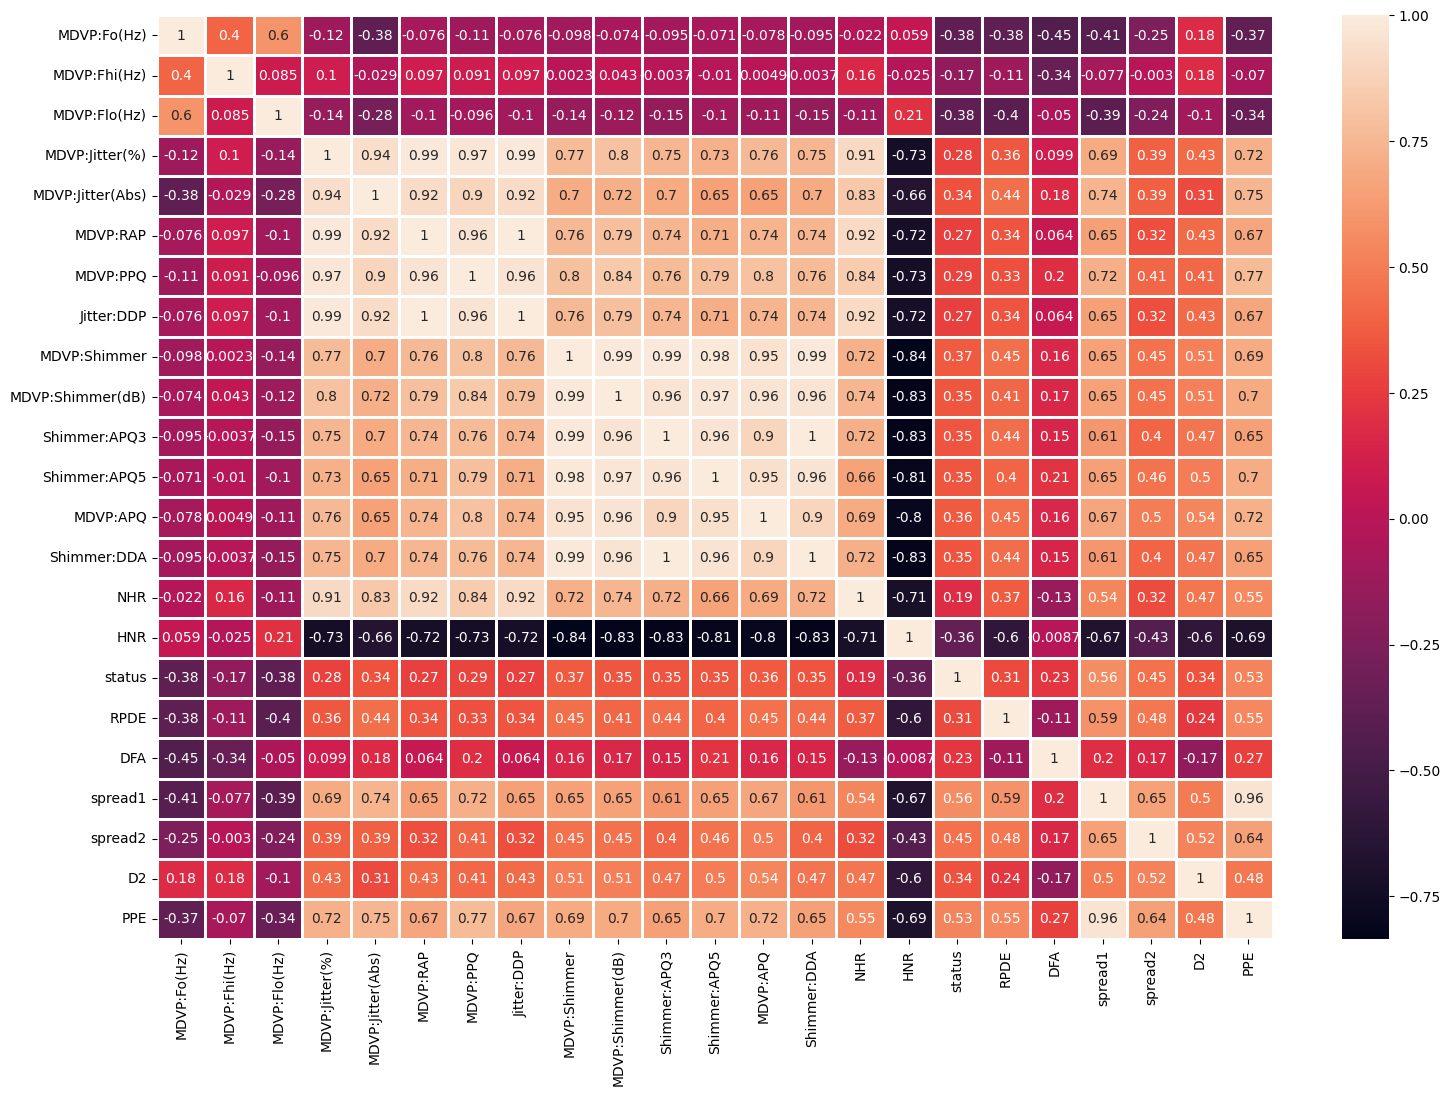

In [14]:
# exploring the relationships between variables
import seaborn as sns
plt.figure(figsize = (18,12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt ='.2g', linewidth = 1)
plt.show()

### Checking the importance of the features

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd

et = ExtraTreesClassifier()
et.fit(x,y)
print(et.feature_importances_)

[0.10483798 0.045881   0.06052563 0.02859315 0.04882941 0.02737975
 0.02609422 0.03259154 0.02522292 0.0261959  0.03791558 0.03372528
 0.03440654 0.03657645 0.02803444 0.03897416 0.0353953  0.0409999
 0.09885007 0.05484541 0.04259299 0.09153238]


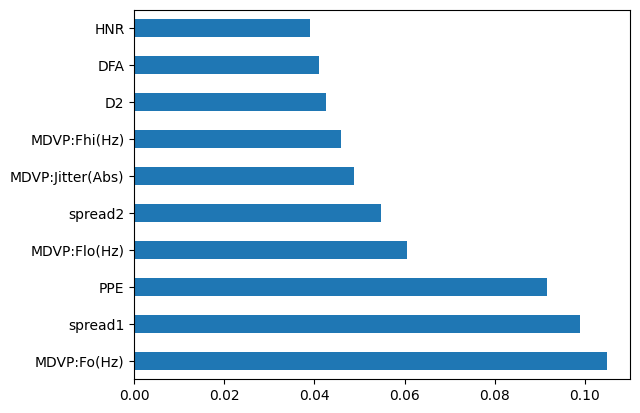

In [29]:
#Finding 10 Most important features
feature_importances = pd.Series(et.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

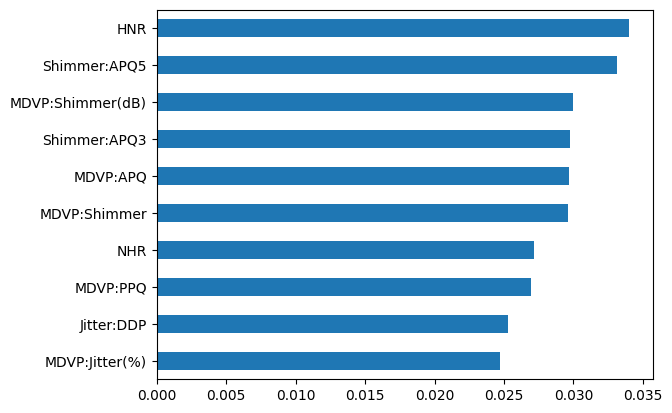

In [27]:
#Finding 10 Least important features
feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

# Explanatory Model Building

In [15]:
# splitting the dataset
from sklearn.model_selection import train_test_split
y = df['status']
x = df.drop('status', axis = 1)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Normalization/Standardization
std = StandardScaler()
X_Train = std.fit_transform(X_Train)
X_Test = std.transform(X_Test)

In [17]:
# Model Training

# Decision Tree:

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
dt = DecisionTreeClassifier()
dt = dt.fit(X_Train, Y_Train)
pred = dt.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.9230769230769231

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39


 confussion matrix:
 [[ 5  2]
 [ 1 31]]


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
lr = LogisticRegression()
lr = lr.fit(X_Train, Y_Train)
pred = lr.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8974358974358975

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


 confussion matrix:
 [[ 3  4]
 [ 0 32]]


# K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_Train, Y_Train)
pred = knn.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.9487179487179487

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


 confussion matrix:
 [[ 5  2]
 [ 0 32]]


# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_Train, Y_Train)
pred = nb.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.717948717948718

 clasification report:
               precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.89      0.75      0.81        32

    accuracy                           0.72        39
   macro avg       0.61      0.66      0.62        39
weighted avg       0.79      0.72      0.74        39


 confussion matrix:
 [[ 4  3]
 [ 8 24]]


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_Train, Y_Train)
pred = rf.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.9487179487179487

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


 confussion matrix:
 [[ 5  2]
 [ 0 32]]


# Support Vector Machine

In [24]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(X_Train, Y_Train)
pred = svm.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.8974358974358975

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39


 confussion matrix:
 [[ 3  4]
 [ 0 32]]


# XGBoost

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_Train, Y_Train)
pred = xgb.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.9487179487179487

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


 confussion matrix:
 [[ 5  2]
 [ 0 32]]


## From above we can see that knn, random forest and xgboost have the same accuracy score of approximately 95%.
## But, We are selecting XGBoost because it is more flexible and handles complex relationships easily.

# Improving the performance of XGBoost by Hyper-Parameter Optimization (Tunning)

In [33]:
# Finding the best parameters by using gridsearchcv
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], 'n_estimators': [100, 500, 1000], 'colsample_bytree': [0.3, 0.7, 1], 'subsample': [0.3, 0.7, 1],}
xgbC = XGBClassifier()
optimize_model = GridSearchCV(estimator=xgbC, param_grid=params, scoring='neg_mean_squared_error', verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters:  {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}


In [34]:
# using the best parameters to evaluate the performance of our model
from xgboost import XGBClassifier
hyper_xgb = XGBClassifier(colsample_bytree = 1, learning_rate = 0.2, max_depth = 3, n_estimators = 500, subsample = 1)
hyper_xgb = hyper_xgb.fit(X_Train, Y_Train)
pred = hyper_xgb.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.9487179487179487

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


 confussion matrix:
 [[ 5  2]
 [ 0 32]]


#### After hyperparamter optimization, we can see that the performance of our model is same. Hence, it clarifies that we have already achieved the best accuracy score possible.

## Predictive System

In [35]:
df.head(1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [36]:
# Get the values of the first row and convert them to a list
first_row_values = df.iloc[0].tolist()
print(first_row_values)

[119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 1.0, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654]


In [39]:
input_data = (119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = hyper_xgb.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Parkinsons Disease not detected!')
else:
  print("You have Parkinson's Disease!")

[1]
You have Parkinson's Disease!


# Saving the Model

In [40]:
# saving the model using Pickle
import pickle
filename = 'parkinson.sav'
pickle.dump(hyper_xgb, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('parkinson.sav', 'rb'))